In [50]:
import shap
import pandas
import keras


from keras.models import Sequential
from keras.layers import Dense, Input
from sklearn.model_selection import GroupKFold


keras.__version__
shap.initjs()


In [51]:
folder_path = 'C:\\Users\\aoife\Documents\\Project\\filtered_data\\'

dataset = pandas.read_csv(folder_path + 'normalised_activity_and_survey_data.csv', usecols=['participantId', 'bodyMass_kg', 'height_m', 'bmi', 'mean_hr/s', 'max_hr', 'min_hr', 'totalSteps', 'totalDistance', 'ssq_score', 'alcohol_consumption', 'basic_expenses', 'caffeine', 'daily_activities', 'daily_smoking', 'education', 'flexible_work_hours', 'gender', 'good_life', 'hispanic','income', 'marital', 'race', 'smoking_status', 'menopause', 'recent_births', 'current_pregnant', 'work_schedule', 'alarm_dependency', 'driving_sleepy', 'falling_asleep', 'morning_person', 'nap_duration', 'sleep_lost', 'sleep_needed', 'sleep_partner', 'sleep_time_workday', 'sleep_time_weekend', 'wake_up_choices', 'wake_ups', 'weekly_naps', 'noise_light', 'stress_thinking', 'other_person', 'pain_discomfort', 'nightmares', 'bathroom_urges', 'other_reasons'])

X = dataset[['bodyMass_kg', 'height_m', 'bmi', 'mean_hr/s', 'max_hr', 'min_hr', 'totalSteps', 'totalDistance', 'alcohol_consumption', 'basic_expenses', 'caffeine', 'daily_activities', 'daily_smoking', 'education', 'flexible_work_hours', 'gender', 'good_life', 'hispanic','income', 'marital', 'race', 'smoking_status', 'menopause', 'recent_births', 'current_pregnant', 'work_schedule', 'alarm_dependency', 'driving_sleepy', 'falling_asleep', 'morning_person', 'nap_duration', 'sleep_lost', 'sleep_needed', 'sleep_partner', 'sleep_time_workday', 'sleep_time_weekend', 'wake_up_choices', 'wake_ups', 'weekly_naps', 'noise_light', 'stress_thinking', 'other_person', 'pain_discomfort', 'nightmares', 'bathroom_urges', 'other_reasons']].values
y = dataset['ssq_score'].values


In [52]:
print(len(X), len(y))

groups = dataset['participantId'].values

feature_names = ['bodyMass_kg','height_m','bmi','mean_hr/s','max_hr','min_hr','totalSteps','totalDistance', 'alcohol_consumption', 'basic_expenses', 'caffeine', 'daily_activities', 'daily_smoking', 'education', 'flexible_work_hours', 'gender', 'good_life', 'hispanic','income', 'marital', 'race', 'smoking_status', 'menopause', 'recent_births', 'current_pregnant', 'work_schedule', 'alarm_dependency', 'driving_sleepy', 'falling_asleep', 'morning_person', 'nap_duration', 'sleep_lost', 'sleep_needed', 'sleep_partner', 'sleep_time_workday', 'sleep_time_weekend', 'wake_up_choices', 'wake_ups', 'weekly_naps', 'noise_light', 'stress_thinking', 'other_person', 'pain_discomfort', 'nightmares', 'bathroom_urges', 'other_reasons']


664 664


In [53]:
'''l1size = 10
l2size = 5'''

'''l1size = 30
l2size = 15
l3size = 5'''

l1size = 30
l2size = 30
l3size = 15
l4size = 5


In [54]:
import numpy as np
from sklearn.model_selection import train_test_split

unique_participants = np.unique(groups)
train_val_groups, test_groups = train_test_split(unique_participants, test_size=0.2, random_state=42) # 0.2 test
train_groups, val_groups = train_test_split(train_val_groups, test_size=0.25, random_state=42) # 0.2 val


def filter_data(groups, group_labels, X, y):
    mask = np.isin(groups, group_labels)
    return X[mask], y[mask]

X_train, y_train = filter_data(groups, train_groups, X, y)
X_val, y_val = filter_data(groups, val_groups, X, y)
X_test, y_test = filter_data(groups, test_groups, X, y)


In [55]:
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.optimizers import SGD
import keras

model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(l1size, activation='relu'))
model.add(Dense(l2size, activation='relu'))
model.add(Dense(l3size, activation='relu'))
model.add(Dense(l4size, activation='relu'))
model.add(Dense(1, activation='linear'))

optm = SGD(learning_rate=0.01, momentum=0.0)
model.compile(optimizer=optm, loss='mse', metrics=[keras.metrics.RootMeanSquaredError()])

history = model.fit(X_train, y_train, epochs=400, batch_size=1, validation_data=(X_val, y_val))

'''predict_train = model.predict(X_train)
predict_val = model.predict(X_val)

train_rmse_history = history.history['root_mean_squared_error']
val_rmse_history = history.history['val_root_mean_squared_error']
train_mse_history = history.history['loss']
val_mse_history = history.history['val_loss']'''

final_test_metrics = model.evaluate(X_test, y_test, verbose=1)
final_test_mse = final_test_metrics[0]
final_test_rmse = final_test_metrics[1]

print("Final Test MSE:", final_test_mse)
print("Final Test RMSE:", final_test_rmse)


Epoch 1/400
556/556 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1033 - root_mean_squared_error: 0.3114 - val_loss: 0.0869 - val_root_mean_squared_error: 0.2948
Epoch 2/400
556/556 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0542 - root_mean_squared_error: 0.2325 - val_loss: 0.0804 - val_root_mean_squared_error: 0.2836
Epoch 3/400
556/556 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0516 - root_mean_squared_error: 0.2269 - val_loss: 0.0800 - val_root_mean_squared_error: 0.2828
Epoch 4/400
556/556 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0432 - root_mean_squared_error: 0.2071 - val_loss: 0.0784 - val_root_mean_squared_error: 0.2801
Epoch 5/400
556/556 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0526 - root_mean_squared_error: 0.2286 - val_loss: 0.0778 - val_root_mean_squared_error: 0.2788
Epoch 6/400
556/556 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0412 - root_mean_squared_error: 0.2023 - val_loss: 0.0755 - val_root_mean_squared_error: 0.2747
Epoch 7/400
556/556 ━━━━━━━━━━━━━━━━━━━━ 1s 1m

In [56]:
def model_predict(data):
    return model.predict(data)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
(10, 46)
[[1.29149606e-01 6.44338235e-01 1.30879320e-01 4.15956707e-01
  6.70750000e-01 2.04250000e-01 2.66050420e-02 2.87496875e-02
  2.00000000e-01 6.00000000e-01 3.33333333e-02 1.11111111e-01
  1.00000000e+00 1.00000000e+00 5.00000000e-01 1.00000000e+00
  1.00000000e+00 0.00000000e+00 7.50000000e-01 0.00000000e+00
  5.00000000e-01 3.75000000e-01 1.00000000e+00 1.00000000e+00
  0.00000000e+00 8.33333333e-01 1.00000000e+00 8.00000000e-01
  0.00000000e+00 0.00000000e+00 8.33333333e-01 1.04166667e-02
  2.91666667e-01 2.00000000e-01 2.91666667e-01 3.33333333e-01
  3.33333333e-01 3.33333333e-02 0.00000000e+00 1.00000000e+00
  1.00000000e+00 0.00000000e+00 1.00000000e+00 1.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [1.25719685e-01 6.63014706e-01 1.20326895e-01 3.15000000e-01
  4.25000000e-01 2.54250000e-01 2.18907563e-02 1.38917062e-02
  1.00000000e+00 6.00000000e-01 8.33333333e-02 0.00000000e+00
  1.00000000e+00 8.00000000e-01 0.00000000e+00 1.000

  0%|          | 0/10 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
6675/6675 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step


 10%|█         | 1/10 [00:11<01:47, 11.97s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
6675/6675 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step


 20%|██        | 2/10 [00:22<01:29, 11.19s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
6675/6675 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step


 30%|███       | 3/10 [00:49<02:08, 18.38s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
6675/6675 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step


 40%|████      | 4/10 [01:37<03:00, 30.16s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
6675/6675 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step


 50%|█████     | 5/10 [02:25<03:02, 36.57s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
6682/6682 ━━━━━━━━━━━━━━━━━━━━ 24s 4ms/step


 60%|██████    | 6/10 [03:10<02:36, 39.23s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
6682/6682 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step


 70%|███████   | 7/10 [03:52<02:01, 40.43s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
6675/6675 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step


 80%|████████  | 8/10 [04:36<01:22, 41.31s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
6675/6675 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step


 90%|█████████ | 9/10 [05:21<00:42, 42.51s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
6675/6675 ━━━━━━━━━━━━━━━━━━━━ 26s 4ms/step


100%|██████████| 10/10 [06:09<00:00, 36.95s/it]


(10, 46)


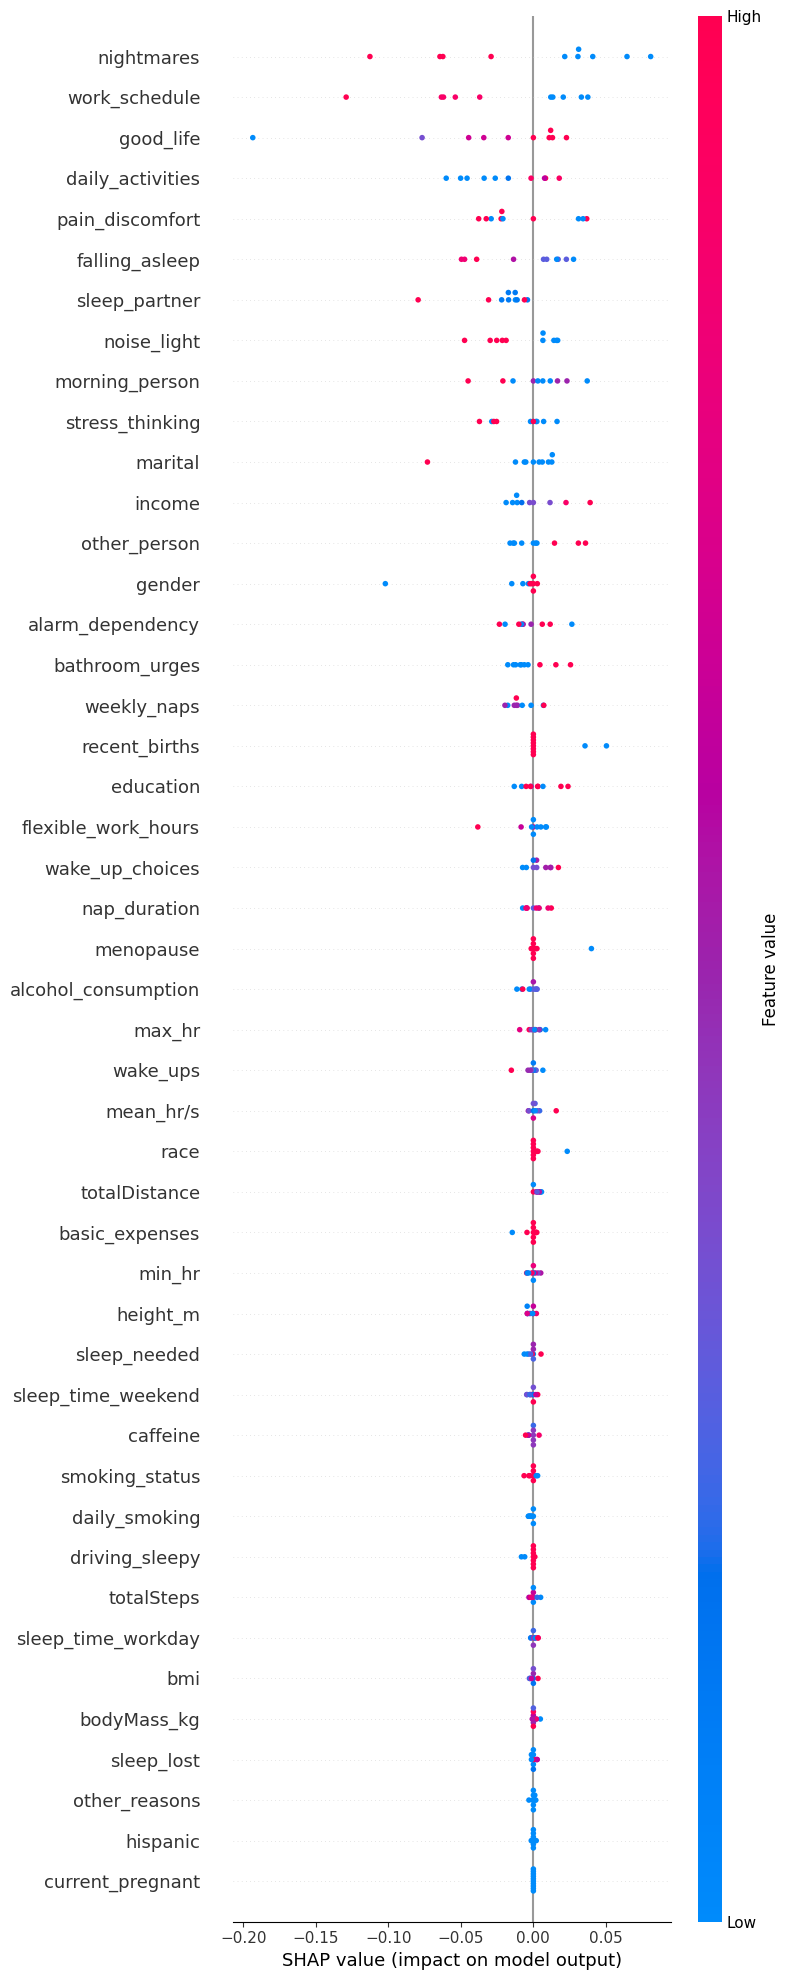

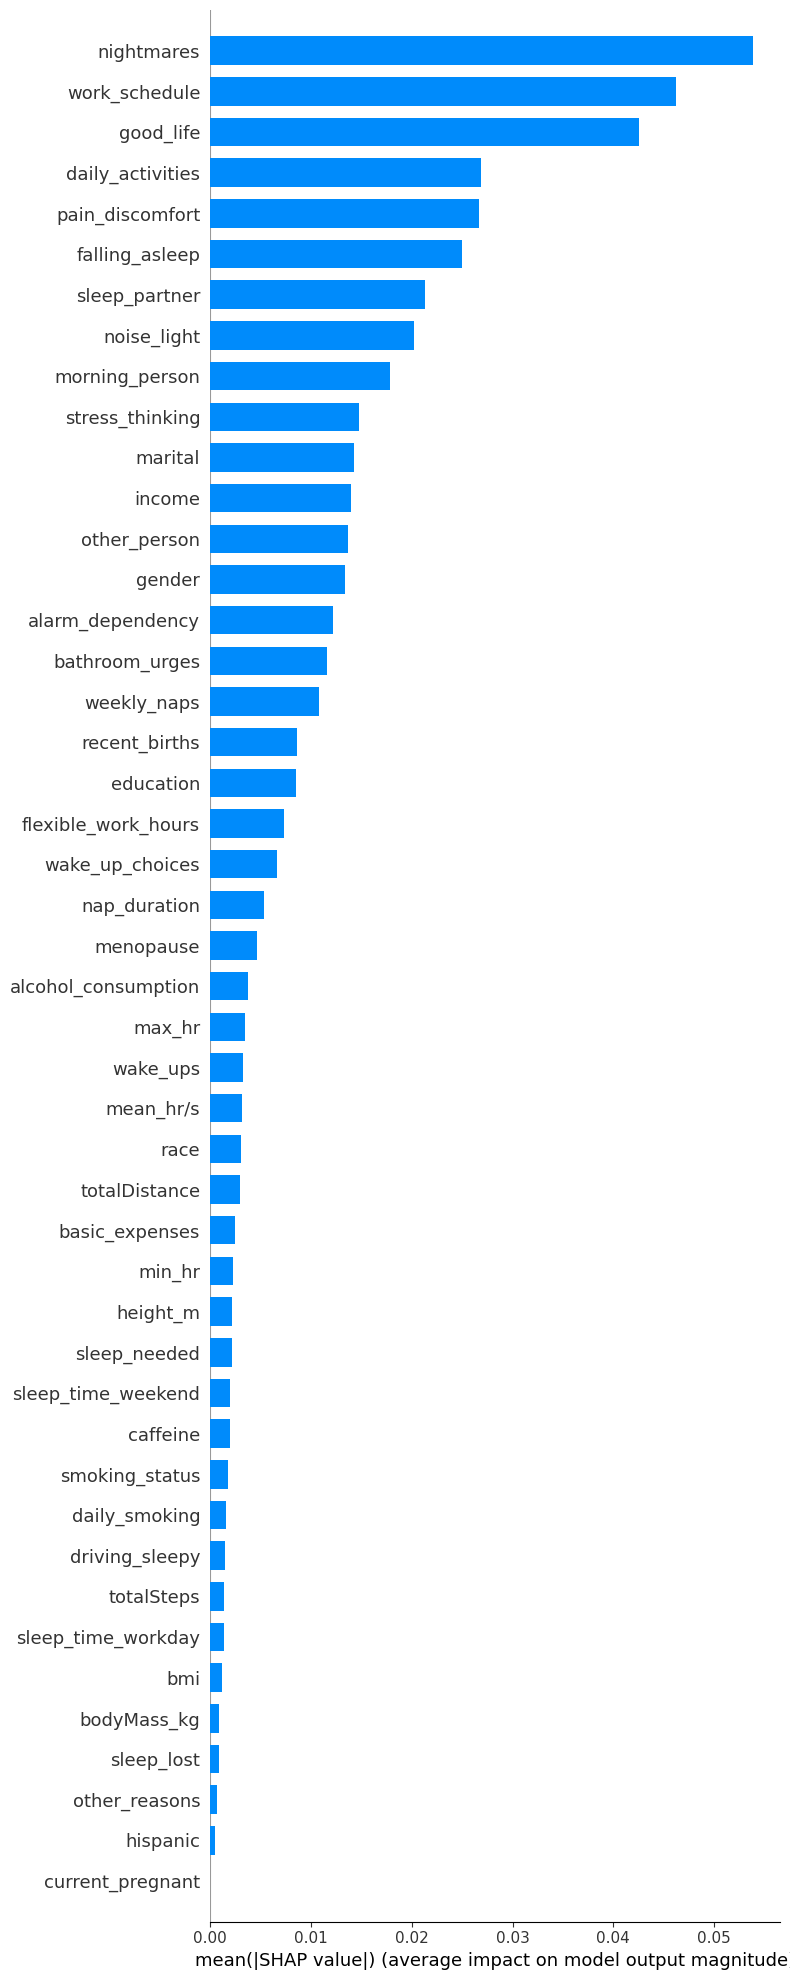

In [57]:
background = shap.sample(X_train, 100) # 100 random samples
explainer = shap.KernelExplainer(model_predict, background)

print(X_test[:10].shape)
print(X_test[:10])



shap_values = explainer.shap_values(X_test[:10])
shap_values = np.array(shap_values).squeeze(axis=2)

print(np.array(shap_values).shape)

shap.summary_plot(shap_values, X_test[:10], feature_names=feature_names, max_display=49)
shap.summary_plot(shap_values, X_test[:10], feature_names=feature_names, plot_type='bar', max_display=49)

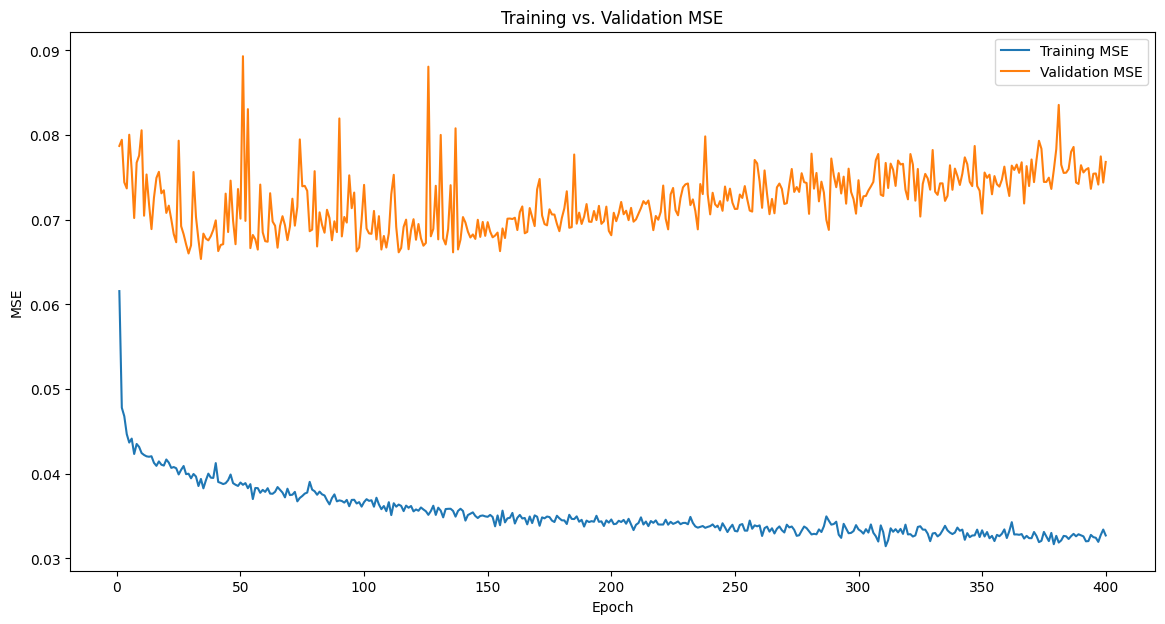

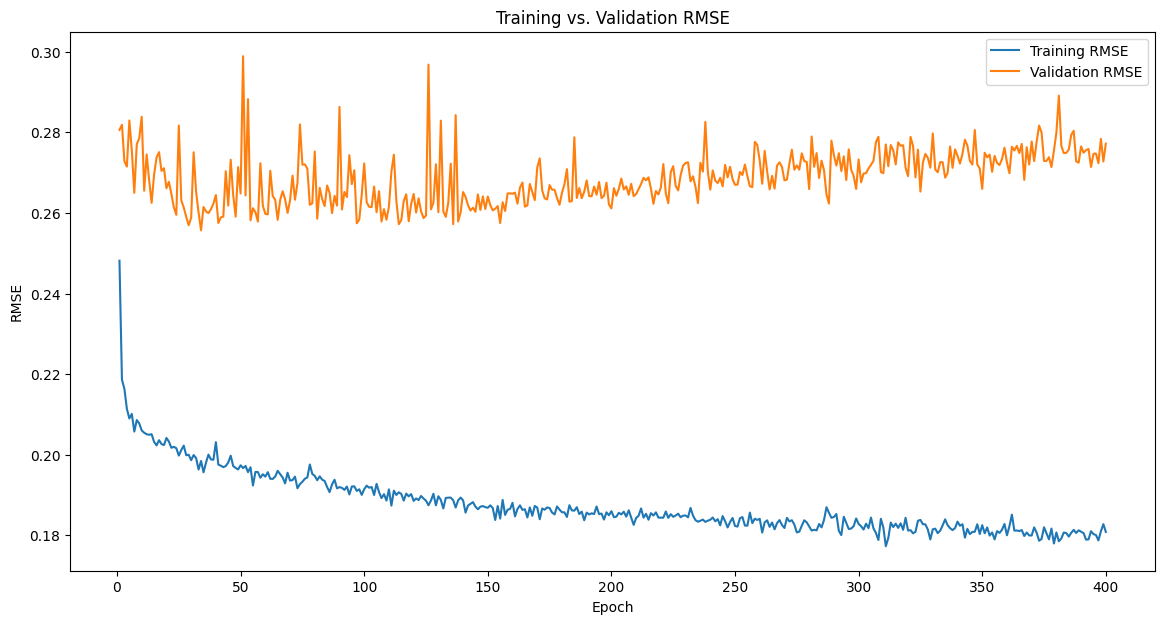

In [58]:
import matplotlib.pyplot as plt

epochs = range(1, len(train_mse_history) + 1)

# Plotting the MSEs
plt.figure(figsize=(14, 7))
plt.plot(epochs, train_mse_history, label='Training MSE')
plt.plot(epochs, val_mse_history, label='Validation MSE')
plt.title('Training vs. Validation MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.show()

# Plotting the RMSEs
plt.figure(figsize=(14, 7))
plt.plot(epochs, train_rmse_history, label='Training RMSE')
plt.plot(epochs, val_rmse_history, label='Validation RMSE')
plt.title('Training vs. Validation RMSE')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()
plt.show()


In [59]:
# Check the model's output shape
print(model.output_shape)


(None, 1)
